In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import io
df = pd.read_csv("/content/loan_data (1).csv")

In [ ]:
len(df.columns[df.isnull().sum(axis = 0)> 0])

67

In [ ]:
#lets see this 67 columns with missing values
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
 print(df.isnull().sum().sort_values(ascending = False).head(67))

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

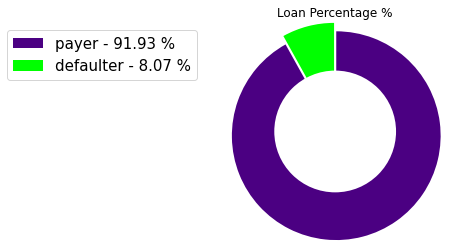

In [ ]:
x = np.char.array(['defaulter', 'payer'])
y = np.array([24825, 282686])
colors = ['lime','indigo']
porcent = 100.*y/y.sum()
explode = (0.05,0.05)

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)

plt.title("Loan Percentage %")
plt.savefig('piechart.png', bbox_inches='tight')
plt.show()


0    282686
1     24825
Name: TARGET, dtype: int64

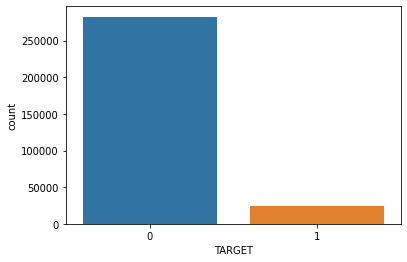

In [ ]:
target = df['TARGET'].value_counts()
sns.countplot(x='TARGET', data=df)
target

Random over-sampling:
1    282686
0    282686
Name: TARGET, dtype: int64


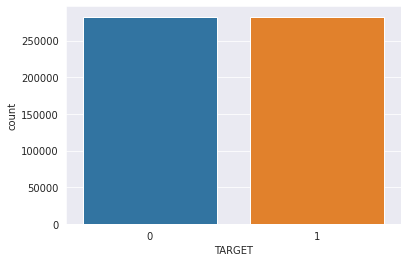

In [ ]:
count_class_0, count_class_1 = df['TARGET'].value_counts()
df_0 = df[df['TARGET'] == 0]
df_1 = df[df['TARGET'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over['TARGET'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='TARGET', data=df_test_over)

In [ ]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l


rmissingvaluecol(df,50)

# Columns having more than 50 percent missing values:  41
Columns:
 ['APARTMENTS_MODE', 'ENTRANCES_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_AVG', 'WALLSMATERIAL_MODE', 'YEARS_BUILD_MODE', 'LANDAREA_MEDI', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MEDI', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'COMMONAREA_AVG', 'LIVINGAREA_AVG', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'COMMONAREA_MODE', 'ELEVATORS_AVG', 'LIVINGAPARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'FLOORSMIN_MODE', 'LIVINGAREA_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE', 'FLOORSMIN_AVG', 'APARTMENTS_AVG', 'HOUSETYPE_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'LANDAREA_AVG', 'NONLIVINGAREA_MODE', 'LANDAREA_MODE', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MODE', 'ENTRANCES_AVG', 'YEARS_BUILD_MEDI', 'APARTMENTS_MEDI', 'BASEMENTAREA_AVG']


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE'

In [ ]:
l = rmissingvaluecol(df, 50)
newdf = df[l]

# Columns having more than 50 percent missing values:  41
Columns:
 ['APARTMENTS_MODE', 'ENTRANCES_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_AVG', 'WALLSMATERIAL_MODE', 'YEARS_BUILD_MODE', 'LANDAREA_MEDI', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MEDI', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'COMMONAREA_AVG', 'LIVINGAREA_AVG', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'COMMONAREA_MODE', 'ELEVATORS_AVG', 'LIVINGAPARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'FLOORSMIN_MODE', 'LIVINGAREA_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE', 'FLOORSMIN_AVG', 'APARTMENTS_AVG', 'HOUSETYPE_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'LANDAREA_AVG', 'NONLIVINGAREA_MODE', 'LANDAREA_MODE', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MODE', 'ENTRANCES_AVG', 'YEARS_BUILD_MEDI', 'APARTMENTS_MEDI', 'BASEMENTAREA_AVG']


In [ ]:
newdf['NAME_TYPE_SUITE'].fillna(newdf['NAME_TYPE_SUITE'].mode()[0], inplace=True)
newdf['OCCUPATION_TYPE'].fillna(newdf['OCCUPATION_TYPE'].mode()[0], inplace=True)
newdf['EMERGENCYSTATE_MODE'].fillna(newdf['EMERGENCYSTATE_MODE'].mode()[0], inplace=True)




In [ ]:
df_missing_values=[]
for col in newdf.columns:
    if newdf[col].isnull().sum() !=0:
         df_missing_values.append(col)
print(df_missing_values)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [ ]:
for col in newdf.columns:
    if col in (df_missing_values):
        newdf[col].replace(np.nan, newdf[col].mean(),inplace=True)

In [ ]:
len(newdf.columns[newdf.isnull().sum(axis = 0)> 0])

0

In [ ]:
# Create correlation matrix
corr_matrix = newdf.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
highly_Correlated = [column for column in upper.columns if any(abs(upper[column]) > 0.90)]

highly_Correlated

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [ ]:
#droping unneccesary columns like the ones that have high correlation
cols_drop = ['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']


for data in [newdf]:
    data.drop(columns = cols_drop,inplace=True)

In [ ]:
obj_df = newdf.select_dtypes(include=['object'])

In [ ]:
from sklearn import preprocessing
newdf = newdf.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
newdf.dtypes.value_counts()

int64    73
dtype: int64

In [ ]:
X = newdf.drop(['TARGET'], axis=1)
y = newdf['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from keras import optimizers
import tensorflow as tf

In [ ]:
from sklearn.base import BaseEstimator
class NaivePredictor(BaseEstimator):
    """ Naive predictor is a benchmark 
        model that will always predict that a loan
        will always get repaid.
    """
    
    def fit(self,X,y):
        """Do nothing"""
        pass
    
    def predict(self,X):
        """ Always predict 0 for loan repayment."""
        return np.zeros(X.shape[0])
    
    def predict_proba(self,X): 
        """ Return probability 100% for loan repayment."""
        prob = np.zeros((X.shape[0],2))
        
        #predict 100% loan repayment
        prob[:,0]=1
        
        return prob

In [ ]:
def auc_roc(y_true, y_pred):
    # any tensorflow metric
#     value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)
    value, update_op = tf.metrics.auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

class NeuralNetwork(BaseEstimator):
    """ Two layer neural network.
    """
    def __init__(self,input_shape=None,epochs=15,batch_size=250, optimizer='adagrad', init='normal'):
        
        self.optimizer = optimizer
        self.init = init
        self.batch_size = batch_size
        self.epochs = epochs
        self.input_shape=input_shape
        
        self.model_ = Sequential()
        self.model_.add(Dense(300, input_dim=input_shape ,kernel_initializer=self.init ,  activation='relu'))
        self.model_.add(Dense(1,kernel_initializer=self.init ,activation='sigmoid'))
        self.model_.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=[ auc_roc])
    
    def fit(self,X,y,valid_set=None):
        """Fit model"""
        
        if valid_set is None:
            return self.model_.fit(X,y, epochs=self.epochs,verbose=0,  validation_split=0.1, batch_size =self.batch_size)
        else:
            return self.model_.fit(X,y, epochs=self.epochs,verbose=0,  validation_data=valid_set , batch_size =self.batch_size)
    
    def predict(self,X, y=None):
        """ Always predict 0 for loan repayment."""
        probs = np.zeros((X.shape[0],2) )
        probs[:,1] = self.model_.predict(X).flatten()
        probs[:,0] = 1 - probs[:,1]
        
        return np.argmax(probs, axis=1)
    
    def score(self, X, y=None):
        # counts number of values bigger than mean
        return(sum(self.predict(X))) 
    
    def predict_proba(self,X): 
        """ Return probability ."""
        probs = np.zeros((X.shape[0],2) )
        probs[:,1] = self.model_.predict(X).flatten()
        probs[:,0] = 1 - probs[:,1]
        
        return probs

Bench AUC: 0.5000


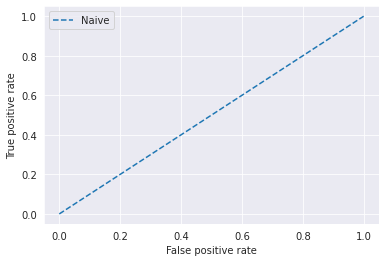

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#define bench mark model and train it
bench = NaivePredictor()
bench.fit(X_train, y_train )

# predict probabilities
# keep probabilities for the positive outcome only
probs_bench = bench.predict_proba(X_test)[:,1]

# calculate AUC
auc_bench = roc_auc_score(y_test, probs_bench)
print('Bench AUC: {:.4f}'.format(auc_bench))

# calculate roc curve
fpr_bench, tpr_bench, thresholds_bench  = roc_curve(y_test, probs_bench)

# plot the roc curve for the model

plt.plot(fpr_bench, tpr_bench,linestyle='--',label='Naive')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate') 

# show the plot
plt.legend()
plt.show()